In [5]:
import re 
import matplotlib.pyplot as plt
import scikitplot as skplt
import fine_tunned_bert
%matplotlib inline


import pandas as pd
from sklearn.model_selection import train_test_split

# Neural Net classifier 
import tensorflow as tf 

In [6]:
from tensorflow.keras import metrics 
from sklearn.metrics import confusion_matrix


In [1]:
# import negative emotion labeled ads
df = pd.read_csv('./data/negative_emotion_dataset.csv').drop(columns= ['Unnamed: 0'])
df

,ad,neg_emo
0,x match your matching gift now will support hu...,1
1,volcán de fuego relief project we are sharing ...,1
2,stand with sharice gtgt republicans to drop a ...,1
3,a dedicated leader with proven experience and ...,1
4,years of obstruction corruption and failed le...,1
...,...,...
23995,oregon the top us producer of christmas trees ...,0
23996,the real winners when we invest in natgas and ...,0
23997,congresswoman mimi walters helped add almost ...,0
23998,trump brags that the economy is booming but s...,0


In [11]:
bert_model_name='small_bert/bert_en_uncased_L-4_H-512_A-8'

In [13]:
# build test and training datasets 
cleaned_train, cleaned_test,  y_train, y_test = train_test_split(df['ad'], df['neg_emo'], test_size =0.2, random_state=42)
cleaned_train, cleaned_val, y_train, y_val = train_test_split(cleaned_train, y_train,  test_size=0.25, random_state= 42, shuffle = True)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(  (cleaned_train,y_train) ).batch(32)
val_data = tf.data.Dataset.from_tensor_slices( (cleaned_val,y_val) ).batch(32)
test_data = tf.data.Dataset.from_tensor_slices( (cleaned_test,y_test) ).batch(32)
# create the fine_tunned_model
bert_model = fine_tunned_bert.create_fine_tunned_bert(train_data,bert_model_name=bert_model_name)
# training the model
history = bert_model.fit(x=train_data,epochs =5,validation_data = val_data,verbose=False)
# evaluation 
scores = bert_model.evaluate(test_data)
print("-----------------------------------------")
predictions=bert_model.predict(cleaned_test)
results = (predictions>0.5)*1
tn, fp, fn, tp = confusion_matrix(y_test,results).ravel()
print("Fold cofusion matrix")
print((tn, fp, fn, tp))
print("-----------------------------------------")


In [ ]:
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))

113/113 [==============================] - 11s 101ms/step - loss: 0.1390 - accuracy: 0.9639 - precision: 0.9646 - recall: 0.9624 - auc: 0.9884
Accuracy: 96.39%


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, results, target_names=[ 'no negative emotions', 'negative emotions']))

              precision    recall  f1-score   support

 no-scarcity       0.96      0.96      0.96      1792
    scarcity       0.96      0.96      0.96      1808

    accuracy                           0.96      3600
   macro avg       0.96      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600



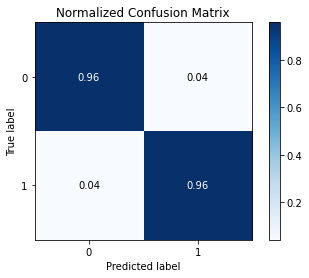

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, results , normalize=True)
plt.show()

In [ ]:
save = pd.read_csv('./data/sample_negative_emotion.csv')
test_data = tf.data.Dataset.from_tensor_slices( (save['ad'],save['neg_emo']) ).batch(32)

# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))



4/4 [==============================] - 0s 111ms/step - loss: 1.0776 - accuracy: 0.8175 - precision: 0.8929 - recall: 0.7463 - auc: 0.8764
Accuracy: 81.75%


confusion matrix:
[[53  6]
 [17 50]]



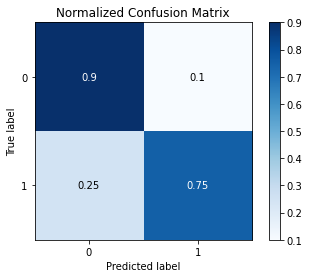

In [ ]:
pred_ =  bert_model.predict(save['ad'])
save['predicted'] = [1 if prob > 0.5 else 0 for prob in pred_]

print("confusion matrix:")
print(metrics.confusion_matrix(save['neg_emo'], save['predicted']))
print()

skplt.metrics.plot_confusion_matrix(save['neg_emo'], save['predicted'], normalize=True)
plt.show()

In [ ]:
print(metrics.classification_report(save['neg_emo'], save['predicted'], target_names=[ 'no negative emotions', 'negative emotions']))

              precision    recall  f1-score   support

 no-scarcity       0.76      0.90      0.82        59
    scarcity       0.89      0.75      0.81        67

    accuracy                           0.82       126
   macro avg       0.82      0.82      0.82       126
weighted avg       0.83      0.82      0.82       126

